Edward Biswas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn import tree
import graphviz
from graphviz import Source

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
data = pd.read_csv('StockX-Data-Contest-2019-3.csv', encoding='utf-8')

In [4]:
# Converting object into int
data['Sale Price'] = data['Sale Price'].astype(str).str.replace('$','').str.replace(',', '').astype(int)
data['Retail Price'] = data['Retail Price'].astype(str).str.replace('$','').str.replace(',', '').astype(int)

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Release Date'] = pd.to_datetime(data['Release Date'], dayfirst=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null int64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 6.1+ MB


In [7]:
data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island


# Distribution Plots

In [8]:
groupby_state = data.groupby('Buyer Region')

Text(0, 0.5, 'Amount of Sneakers Sold')

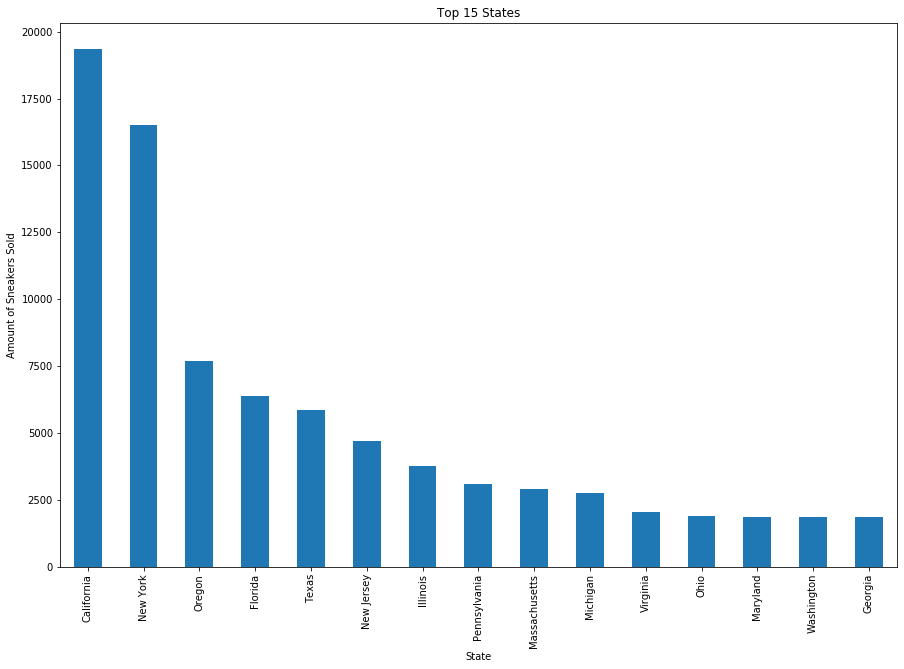

In [9]:
groupby_state_size = groupby_state.size()
groupby_state_size.nlargest(15).plot.bar(figsize=(15,10))
plt.title('Top 15 States')
plt.xlabel('State')
plt.ylabel('Amount of Sneakers Sold')

In [10]:
groupby_popular_brand = data.groupby('Brand').size()
groupby_popular_brand

Brand
 Yeezy       72162
Off-White    27794
dtype: int64

Text(0, 0.5, 'Amount of Sneakers Sold')

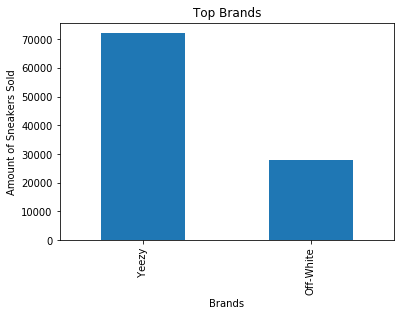

In [11]:
groupby_popular_brand.plot.bar()
plt.title('Top Brands')
plt.xlabel('Brands')
plt.ylabel('Amount of Sneakers Sold')

In [153]:
groupby_popular_sneaker = data.groupby('Sneaker Name')['Profit'].mean()

Text(0, 0.5, 'Avg Profit')

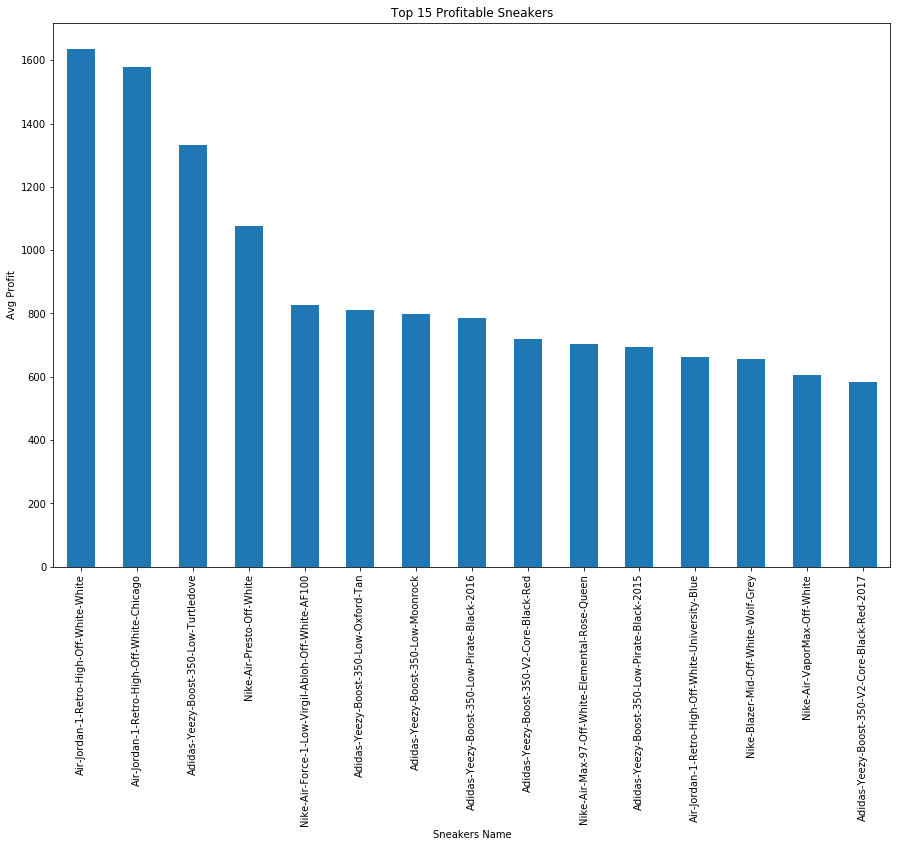

In [155]:
groupby_popular_sneaker.nlargest(15).plot.bar(figsize=(15,10))
plt.title('Top 15 Profitable Sneakers')
plt.xlabel('Sneakers Name')
plt.ylabel('Avg Profit')

In [14]:
groupby_popular_size = data.groupby('Shoe Size').size()

Text(0, 0.5, 'Amount of Sneakers Sold')

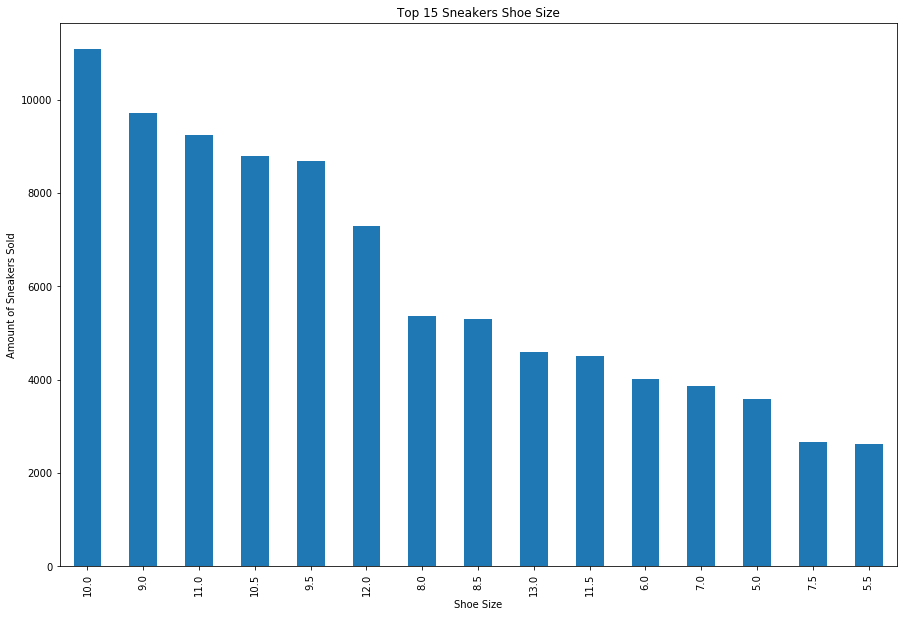

In [15]:
groupby_popular_size.nlargest(15).plot.bar(figsize=(15,10))
plt.title('Top 15 Sneakers Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Amount of Sneakers Sold')

# Relationship Plots

In [16]:
data['Profit'] = data['Sale Price'] - data['Retail Price']
data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island,608


Text(0.5, 1.0, 'Retail Price vs Sale Price')

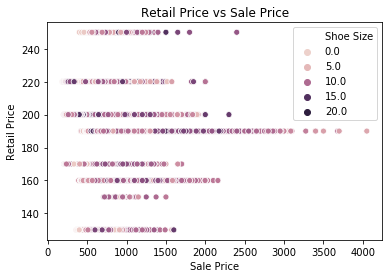

In [195]:
sns.scatterplot(data=data, x='Sale Price', y='Retail Price', hue='Shoe Size').set_title('Retail Price vs Sale Price')

Text(0.5, 1.0, 'Profit vs Shoe Size')

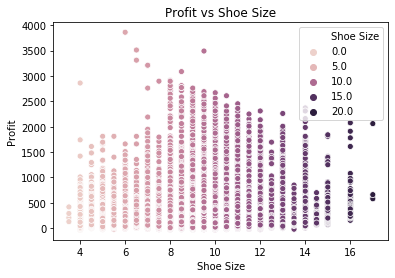

In [196]:
sns.scatterplot(data=data, x='Shoe Size', y='Profit', hue='Shoe Size').set_title('Profit vs Shoe Size')

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Month'] = data['Order Date'].dt.month

Text(0.5, 1.0, 'Profit vs Order Month')

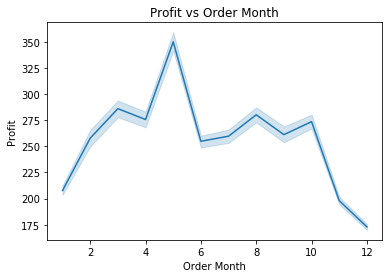

In [197]:
sns.lineplot(data=data, x='Order Month', y='Profit').set_title('Profit vs Order Month')

In [21]:
may_filter = data["Order Date"].dt.month == 12
data[may_filter]["Sale Price"].mean()

382.3814021476359

# Linear Regression Model

In [47]:
dummy = pd.get_dummies(data=data, columns=['Sneaker Name'], drop_first=True)
dummy.head()

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Order Month,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,...,Sneaker Name_Nike-Blazer-Mid-Off-White-Wolf-Grey,Sneaker Name_Nike-React-Hyperdunk-2017-Flyknit-Off-White,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Black,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Sneaker Name_Nike-Zoom-Fly-Off-White,Sneaker Name_Nike-Zoom-Fly-Off-White-Black-Silver,Sneaker Name_Nike-Zoom-Fly-Off-White-Pink,Sneaker Name_adidas-Yeezy-Boost-350-V2-Butter,Sneaker Name_adidas-Yeezy-Boost-350-V2-Static,Sneaker Name_adidas-Yeezy-Boost-350-V2-Static-Reflective
0,2017-01-09,Yeezy,1097,220,2016-09-24,11.0,California,877,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-09,Yeezy,685,220,2016-11-23,11.0,California,465,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-09,Yeezy,690,220,2016-11-23,11.0,California,470,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-09,Yeezy,1075,220,2016-11-23,11.5,Kentucky,855,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-09,Yeezy,828,220,2017-11-02,11.0,Rhode Island,608,1,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
data.groupby('Sneaker Name')['Profit'].mean().nlargest(3)

Sneaker Name
Air-Jordan-1-Retro-High-Off-White-White      1636.070288
Air-Jordan-1-Retro-High-Off-White-Chicago    1579.800000
Adidas-Yeezy-Boost-350-Low-Turtledove        1331.661765
Name: Profit, dtype: float64

In [192]:
lm = smf.ols("Q('Profit') ~ Q('Retail Price') + \
                            Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White') + \
                            Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago') + \
                            Q('Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove')", 
             data=dummy).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q('Profit')   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 2.084e+04
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:24:48   Log-Likelihood:            -6.6967e+05
No. Observations:               99956   AIC:                         1.339e+06
Df Residuals:                   99951   BIC:                         1.339e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                    1111.6701      5.204    213.628      0.000    1101.471    1121.869
Q('Retail Price')                                              -4.2576      0.025   -172.100      0.000      -4.306      -4.209
Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White')    1333.3498     11.135    119.746      0.000    1311.526    1355.174
Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago')  1277.0795      7.194    177.516      0.000    1262.979    1291.180
Q('Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove')      1071.5175     23.840     44.947      0.000    1024.792    1118.243
==============================================================================
Omnibus:                    38345.667   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192034.022
Skew:                           1.808   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                     8.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y = 426.11 - 4.26x1 + 1333.35x2 + 1277.08x3 + 1071.52.55x4

In [193]:
errors = dummy["Profit"] - lm.fittedvalues
square_errors = errors**2
square_errors.mean()

38615.124114770275

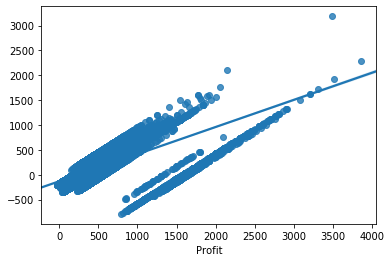

In [194]:
sns.regplot(data=dummy, x='Profit', y=lm.resid)

# Decision Tree

In [161]:
X = dummy.loc[:,['Retail Price',
                 'Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White',
                 'Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago',
                 'Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove']]
X.head()

,Retail Price,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove
0,220,0,0,0
1,220,0,0,0
2,220,0,0,0
3,220,0,0,0
4,220,0,0,0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy['Profit'], test_size=0.2)

In [164]:
reg_train = tree.DecisionTreeRegressor(max_depth=4)
reg_train = reg_train.fit(X_train, y_train)

In [166]:
print(tree.export_graphviz(reg_train)
      .replace('X[0]', 'Retail Price')
      .replace('X[1]', 'AJ1-OW-White')
      .replace('X[2]', 'AJ1-OW-Chicago')
      .replace('X[3]', 'YZY-350-TD'))

digraph Tree {
node [shape=box] ;
0 [label="Retail Price <= 195.0\nmse = 71020.493\nsamples = 79964\nvalue = 237.907"] ;
1 [label="AJ1-OW-Chicago <= 0.5\nmse = 122171.434\nsamples = 18070\nvalue = 533.457"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="AJ1-OW-White <= 0.5\nmse = 77783.731\nsamples = 17456\nvalue = 496.971"] ;
1 -> 2 ;
3 [label="Retail Price <= 180.0\nmse = 58763.151\nsamples = 17207\nvalue = 480.452"] ;
2 -> 3 ;
4 [label="mse = 55678.12\nsamples = 12349\nvalue = 420.661"] ;
3 -> 4 ;
5 [label="mse = 34417.722\nsamples = 4858\nvalue = 632.439"] ;
3 -> 5 ;
6 [label="mse = 70229.623\nsamples = 249\nvalue = 1638.506"] ;
2 -> 6 ;
7 [label="mse = 270238.921\nsamples = 614\nvalue = 1570.774"] ;
1 -> 7 ;
8 [label="Retail Price <= 235.0\nmse = 23139.78\nsamples = 61894\nvalue = 151.621"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="YZY-350-TD <= 0.5\nmse = 20534.851\nsamples = 59188\nvalue = 140.505"] ;
8 -> 9 ;
10 [labe

In [167]:
predictions = reg_train.predict(X_test)
((y_test - predictions)**2).mean()

27601.254021996512

# k-nearest neighbors

In [168]:
y = dummy['Profit']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [174]:
k3nn = KNeighborsClassifier(n_neighbors=5)
k3nn.fit(X_train, y_train)
y_pred = k3nn.predict(X_test)

In [175]:
((y_pred - y_test)**2).mean()

35029.19307723089

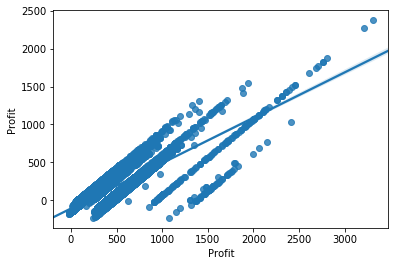

In [178]:
sns.regplot(y_test, y_test - y_pred)

# Cross Tabulation

In [43]:
pd.crosstab(data["Buyer Region"], data['Brand'], margins=True)

Brand,Yeezy,Off-White,All
Buyer Region,,,
Alabama,375,82,457
Alaska,41,20,61
Arizona,1005,393,1398
Arkansas,141,32,173
California,13113,6236,19349
Colorado,702,252,954
Connecticut,844,266,1110
Delaware,818,424,1242
District of Columbia,190,81,271
